In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [131]:
df =pd.read_csv("titanic-training-data.csv")

In [132]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [133]:
df.shape

(891, 12)

In [134]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [135]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

# univariate analysis

<Axes: xlabel='Survived', ylabel='count'>

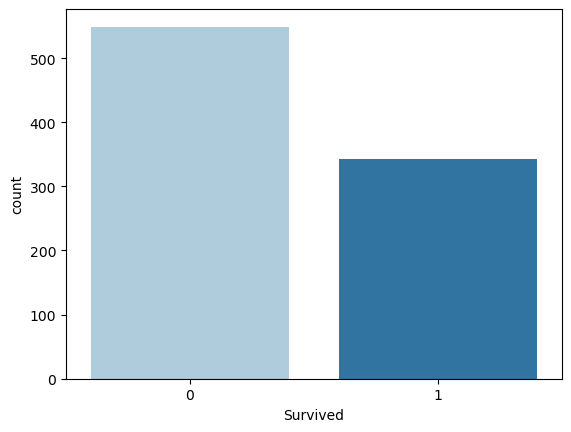

In [136]:
sns.countplot(x="Survived",data=df,palette="Paired")

<Axes: xlabel='Pclass', ylabel='count'>

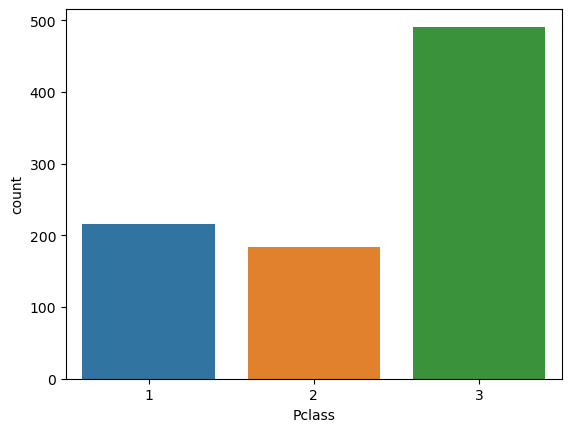

In [137]:
sns.countplot(x="Pclass",data=df)

<Axes: xlabel='Embarked', ylabel='count'>

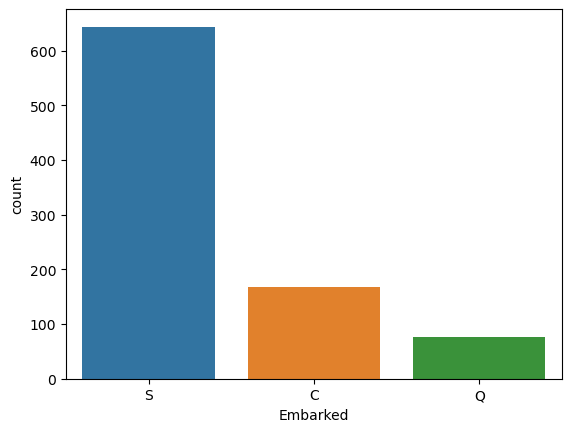

In [138]:
sns.countplot(x="Embarked",data=df)

<Axes: xlabel='Sex', ylabel='count'>

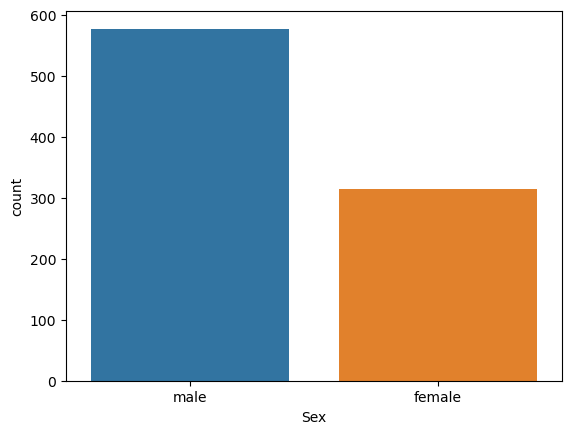

In [139]:
sns.countplot(x="Sex",data=df)

In [140]:
import warnings
warnings.filterwarning("ignore")

AttributeError: module 'warnings' has no attribute 'filterwarning'

In [ ]:
sns.displot(df["Age"])

In [ ]:
sns.boxplot(df["Age"])
plt.show()

In [ ]:
sns.boxplot(df["SibSp"])
plt.show()

In [ ]:
sns.displot(df["SibSp"])
plt.show()

In [ ]:
sns.distplot(df["Parch"])
plt.show()

In [ ]:
df.describe(include="all")

# Bivariate Analysis

In [ ]:
sns.countplot(x="Sex",hue="Pclass",data=df)

In [ ]:
sns.countplot(x="Sex",hue="Embarked",data=df)

In [ ]:
sns.countplot(x="Embarked",hue="Pclass",data=df)

In [ ]:
sns.countplot(x="Pclass",hue="Age",data=df)

In [ ]:
sns.countplot(x="Sex",hue="Age",data=df)

In [ ]:
sns.countplot(x="Embarked",hue="Age",data=df)

# multivariate analysis

In [ ]:
sns.violinplot(x="Sex",y="Age",hue="Embarked",data=df)

In [ ]:
sns.violinplot(x="Pclass",y="Age",hue="Embarked",data=df)

In [ ]:
df=df.drop(columns=["PassengerId","Ticket","Fare","Name","Cabin"],axis=1)

# MISSING VALUES TREATMENT


In [ ]:
median1=df["Age"].median()
df["Age"]=df["Age"].fillna(median1)

In [ ]:
mode1=df["Embarked"].mode()[0]
df["Embarked"]=df["Embarked"].fillna(mode1)

In [ ]:
df.isnull().sum()

# outliers Treatment

In [142]:
q1=df["Age"].quantile(0.25)
q3=df["Age"].quantile(0.75)
iqr=q3-q1

In [143]:
lower_threshold=q1-1.5*iqr
upper_threshold=q3+1.5*iqr

In [144]:
lower_threshold

-6.6875

In [145]:
upper_threshold

64.8125

In [ ]:
df=df[(df["Age"]>=lower_threshold)&(df["Age"]<=upper_threshold)]


In [ ]:
sns.boxplot(df["Age"])
plt.show()

# Encoding

In [ ]:
df=pd.get_dummies(df,columns=["Sex","Embarked"])

In [ ]:
df.dtypes

# HORSEPOWER->?????? (medium)